In [17]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

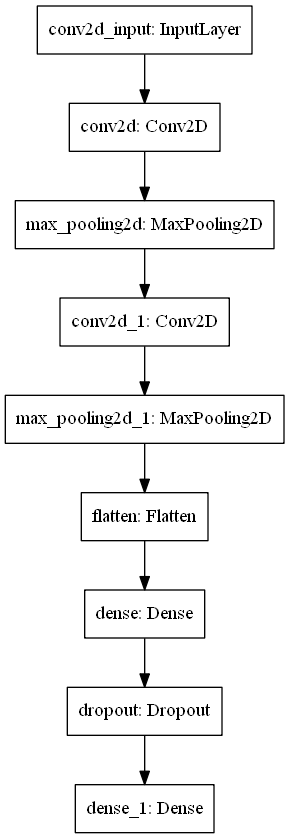

In [5]:
keras.utils.plot_model(model)

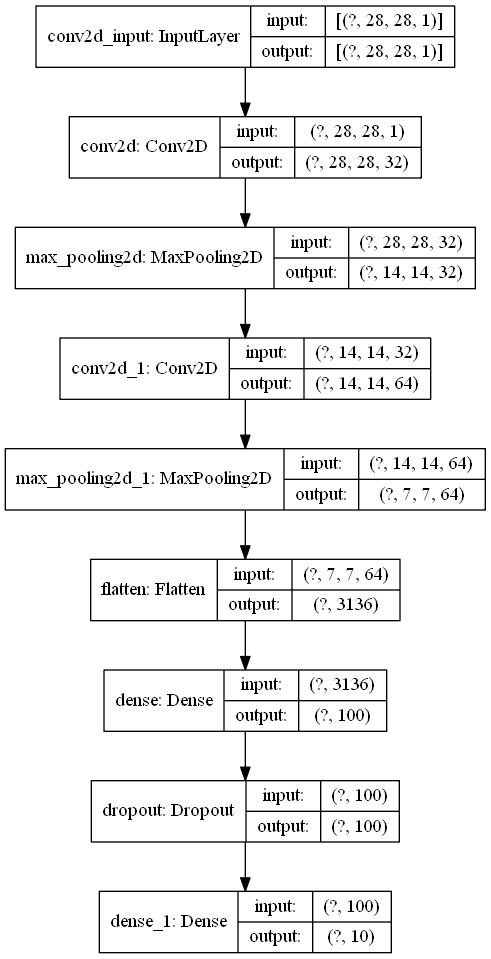

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.5393 - accuracy: 0.8070 - val_loss: 0.3358 - val_accuracy: 0.8762
Epoch 2/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3622 - accuracy: 0.8711 - val_loss: 0.2870 - val_accuracy: 0.8929
Epoch 3/20
1500/1500 [==============================] - 77s 51ms/step - loss: 0.3073 - accuracy: 0.8893 - val_loss: 0.2534 - val_accuracy: 0.9065
Epoch 4/20
1500/1500 [==============================] - 87s 58ms/step - loss: 0.2728 - accuracy: 0.9011 - val_loss: 0.2589 - val_accuracy: 0.9022
Epoch 5/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2491 - accuracy: 0.9093 - val_loss: 0.2358 - val_accuracy: 0.9137
Epoch 6/20
1500/1500 [==============================] - 76s 50ms/step - loss: 0.2298 - accuracy: 0.9159 - val_loss: 0.2365 - val_accuracy: 0.9131
Epoch 7/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2130 - accuracy: 0.9206 - val_loss: 0.2266 -

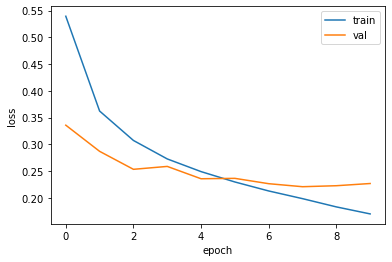

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2209 - accuracy: 0.9190


[0.22094891965389252, 0.9190000295639038]

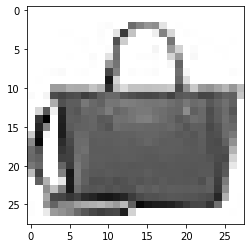

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
preds

array([[1.1704833e-16, 1.5353990e-24, 1.9687737e-21, 2.2459059e-22,
        9.3119485e-19, 2.3471511e-16, 5.9813434e-18, 3.2319066e-16,
        1.0000000e+00, 3.3966693e-19]], dtype=float32)

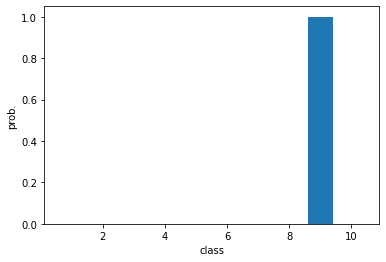

In [15]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [18]:
classes[np.argmax(preds)]

'가방'

In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [20]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 8ms/step - loss: 0.2440 - accuracy: 0.9154


[0.24401476979255676, 0.9154000282287598]